## Multiple Linear Regression method applied to gravimetry data

Hi! This was my final project for my bachelor degree. The method is pretty simple, but the implications are far from it!

In case you are not familiar to gravimetry, I will give you a brief explanation.

#### Gravimetry
Geophysics is the study of Earth's properties based on physics to estimate soil/rock, and other geological objects, properties indirectly - most of the time.

Gravimetry is the study of changes in Earth's gravitational field to estimate rock types, presence of water and other fluid bodies (such as petroleum!). It mainly consists on the reading of Earth's gravity (*observed gravity*, $g_{obs}$) in the study region and comparison with the theoretical value of the same region after corrections are applied in the observed value - caused by global position (latitude), tidal effects, height and density differences from a standard value.

The data is obtained by going to the study region with a gravimeter (be at land, at sea, air or space): a sensible instrument with a precision, typically, in microGals.
$$
1 \mu Gal = 1 \times10^{-8} \,ms^{-2}
$$
The final data from the gravimetry method is the *Bouger anomaly*, and it is obtained by appling the many corrections cited above. The precision of the final result vary from the scale of the data survey: terrestrial survey is much more precise then space survey. However, the anomaly data can be ambiguous: different bodies can cause the same anomaly, so *prior knowledge* of the area, or other data from other geophysical method to comparison can be valuable for data interpretation.

But! Imagine having a estimated data for the area *before* even going to the study field? Wouldn't that be great?! In this work, I propose the method of linear regression to predict data for observed gravity. Since $g_{obs}$ has an implicit dependency on planetary rotation, height to a datum and density of the body that causes this field, I aimed to establish, as a first approximation, a linear mathematical relation between $g_{obs}$ and geographic position (latitude), height and local density by the machine learning method of Multiple Linear Regression (MLR). 

So, lets get started!

#### Importing libraries

In [15]:
import pandas as pd # for data reading
import numpy as np  # for basic operations
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split    # for data split  
from sklearn.preprocessing import StandardScaler        # for data scale
from sklearn.linear_model import LinearRegression       # model itself

#### Setting dependent and independent variables

In [2]:
df = pd.read_excel('ALL_DATA.xlsx', header = None)  # reading my data, that consists on a data survey in site from south Brazil basin,
                                                    # Paraná's basin

In [4]:
x = df.iloc[22:,[2,6,7]].values     # independent variables: latitude, density and height.
y = df.iloc[22:,11].values          # dependent variable: observed gravity.

#### Data split

In my original work, I used the variation of the density to split the data in one model (I did five models, each one with different splits), but that is not the machine-learning-way to do this.
Now, I will split the data randomly, using the library already imported in a 80% train set - 20% test set, split, as usual.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#### Feature scaling
All data must have the same unit and similar ranges, so the model doesn't give more weight to a parameter.

Also, the standardization parameter object must be called both for the independent variables $x$,  and dependent one $y$, because $x$ (independent variables) is much smaller than $y$, and not doing so could cause the model to neglect the $x$ variable. Since both have to be scaled, we need a unique *StandardScaler* object for each, because this object, one called, calculates the *mean* $\mu$ and *standard deviation* $\sigma$ for the dataset that it was called for, and since $y$ is a different dataset than $x$, they will have different parameters. In case you don't know, this is what this object will do:
$$
x_{stand} = \frac{x-\mu}{\sigma}
$$
and the data is then in the range $-3<x_{stand}<3$


In [6]:
scx = StandardScaler()
scy = StandardScaler()

In [7]:
x_train[:,:] = scx.fit_transform(x_train[:,:])
x_test[:,:] = scx.transform(x_test[:,:])

In [8]:
y_train = scy.fit_transform(y_train.reshape(len(y_train),1))
y_test = scy.transform(y_test.reshape(len(y_test),1))

In [9]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred = reg.predict(x_train)
r2_train = ('%.4f' % reg.score(x_train, y_train))
r2_test = ('%.4f' % reg.score(x_test,y_test))

Text(0.5, 1.0, 'Regressor on train set')

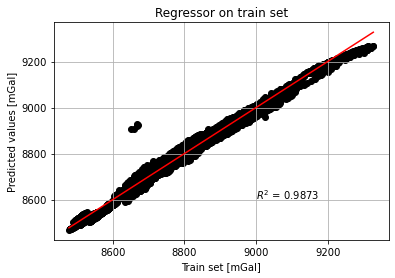

In [11]:


plt.scatter(scy.inverse_transform(y_train), scy.inverse_transform(reg.predict(x_train)), c='black')
plt.plot([min(scy.inverse_transform(y_train)), max(scy.inverse_transform(y_train))],
         [min(scy.inverse_transform(y_train)), max(scy.inverse_transform(y_train))], c='r')
plt.grid()
plt.text(9000,8600,'$R^2$ = '+ str(r2_train))
plt.xlabel('Train set [mGal]')
plt.ylabel('Predicted values [mGal]')
plt.title('Regressor on train set')

Text(0.5, 1.0, 'Regressor on test set')

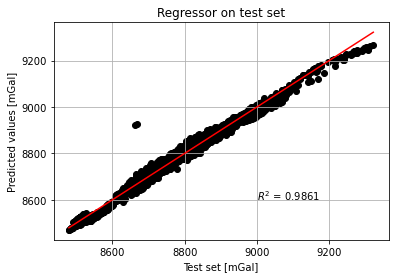

In [12]:
plt.scatter(scy.inverse_transform(y_test), scy.inverse_transform(reg.predict(x_test)), c='black')
plt.plot([min(scy.inverse_transform(y_test)), max(scy.inverse_transform(y_test))],
         [min(scy.inverse_transform(y_test)), max(scy.inverse_transform(y_test))], c='r')
plt.grid()
plt.xlabel('Test set [mGal]')
plt.ylabel('Predicted values [mGal]')
plt.text(9000,8600,'$R^2$ = '+ str(r2_test))

plt.title('Regressor on test set')

In [13]:
print(scx.inverse_transform(reg.coef_))
print(scy.inverse_transform(reg.intercept_.reshape(len(reg.intercept_),1)))

[[-26.91746563   2.47562252 505.34694527]]
[[8738.54456801]]


In [14]:
x_test

array([[1.0101579078119818, -1.241530723333974, -0.7941001295171786],
       [1.4417773753495624, 0.8640108187716804, -0.8607741429809159],
       [0.41012285252730163, 0.8640108187716804, -0.5460585714268316],
       ...,
       [1.149967555547147, 0.8640108187716804, -0.377377664809623],
       [0.96405406644515, -1.241530723333974, -0.9343645478828002],
       [0.9865122186148267, -1.241530723333974, -0.8357565670932184]],
      dtype=object)